<a href="https://colab.research.google.com/github/johnatanDM/MachineLearning/blob/main/Alura_Deep_Learning_Keras_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports do dataset (carregamento e visualização)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


Carregar Dataset

In [2]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


visualizando

In [3]:
#alterando parametros para todas as figuras 
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

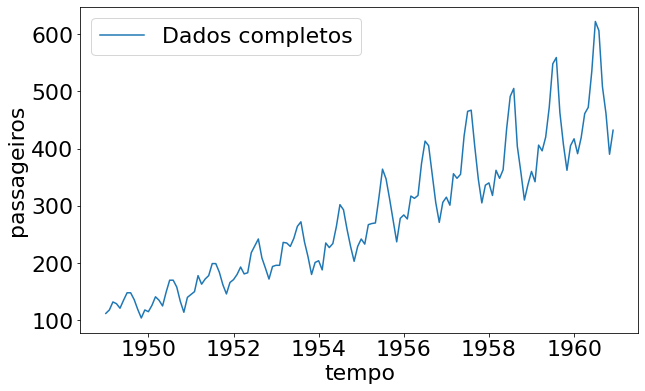

In [4]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='Dados completos')

Imports de préprocessamento dos dados

In [5]:
from sklearn.preprocessing import StandardScaler

Pré-processamento

In [6]:
sc = StandardScaler()
sc.fit(passageiros)
dado_escalado = sc.transform(passageiros)

In [7]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

visualizando

Text(0.5, 0, 'Data')

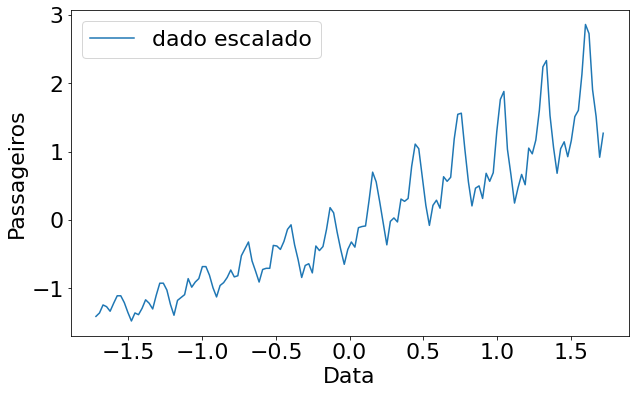

In [8]:
sns.lineplot(x=x, y=y, label='dado escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

Dividindo treino e teste

In [9]:
tamanho_treino = int(len(passageiros) * 0.9)
tamanho_teste = int(len(passageiros) - tamanho_treino)

xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

xtest = x[tamanho_treino:len(passageiros)]
ytest = y[tamanho_treino:len(passageiros)]

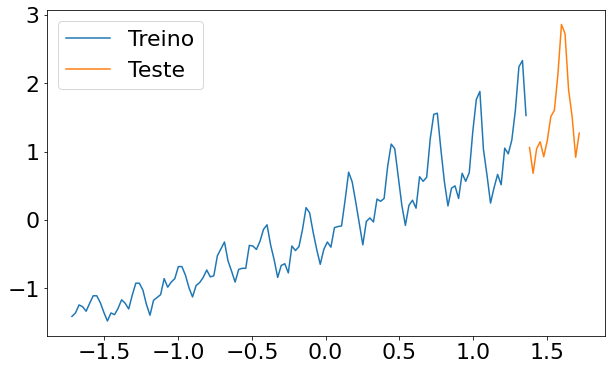

In [10]:
sns.lineplot(x=xtreino, y=ytreino, label='Treino')
sns.lineplot(x=xtest, y=ytest, label='Teste')

Imports da rede neural

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Fazendo uma Regressão Linear Simplificado

In [12]:
regressor = Sequential()

regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', use_bias=False, activation='linear'))

regressor.compile(loss='mean_squared_error', optimizer='adam')

regressor.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [13]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 1s 2ms/step - loss: 0.1274


In [14]:
y_predict = regressor.predict(xtreino)

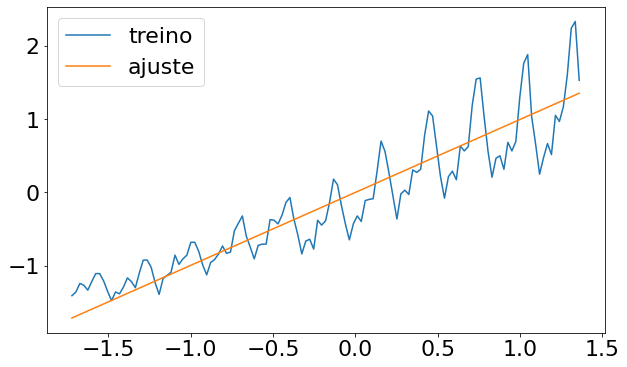

In [15]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste')

In [16]:
#mudando a escala de volta
d = {'tempo': xtreino, 'passageiros' : y_predict[:,0]}
resultados = pd.DataFrame(d) 
resultados

,tempo,passageiros
0,-1.720064,-1.711835
1,-1.696007,-1.687893
2,-1.671950,-1.663952
3,-1.647894,-1.640010
4,-1.623837,-1.616068
...,...,...
124,1.262984,1.256942
125,1.287041,1.280884
126,1.311098,1.304825
127,1.335155,1.328767


In [17]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo', 'passageiros']
resultado_transf

,tempo,passageiros
0,1949.000000,75.650374
1,1949.083333,78.512588
2,1949.166667,81.374802
3,1949.250000,84.237016
4,1949.333333,87.099230
...,...,...
124,1959.333333,430.564798
125,1959.416667,433.427012
126,1959.500000,436.289226
127,1959.583333,439.151425


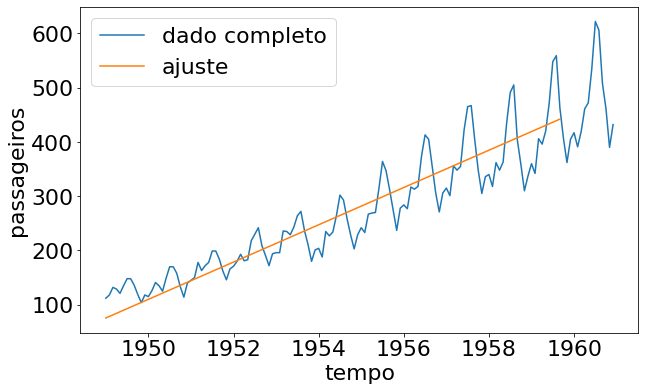

In [18]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste')

Prevendo

In [19]:
y_predict_test = regressor.predict(xtest)

In [20]:
d = {
    'tempo' : xtest,
    'passageiros' : y_predict_test[:,0]
}
resultado_teste = pd.DataFrame(data=d)

In [21]:
#revertendo a escala
resultado_transf_teste = sc.inverse_transform(resultado_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo', 'passageiros']

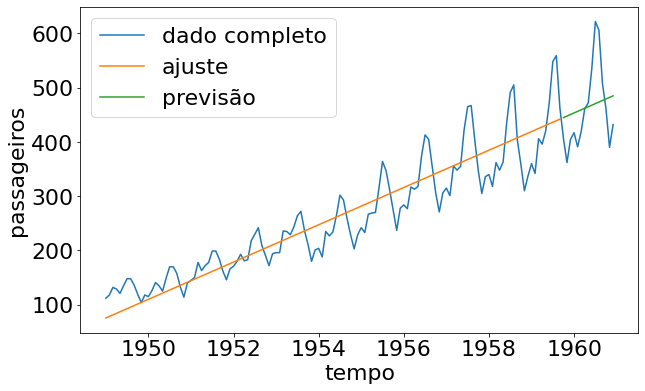

In [22]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf_teste, label='previsão')

Rede Neural Multicamadas

In [23]:
regressor2 = Sequential()

regressor2.add(Dense(8,input_dim=1, kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor2.add(Dense(8,kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

regressor2.compile(loss='mean_squared_error', optimizer='adam')

regressor2.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [24]:
regressor2.fit(xtreino, ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8551
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7722
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8089
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7424
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7905
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7402
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7789
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8423
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7447
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7890
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7865
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7690
Epoch 13/500
5/5 [==============================] - 0s 3ms/st

In [25]:
y_predict2 = regressor2.predict(xtreino)
y_predict_test2 = regressor2.predict(xtest)

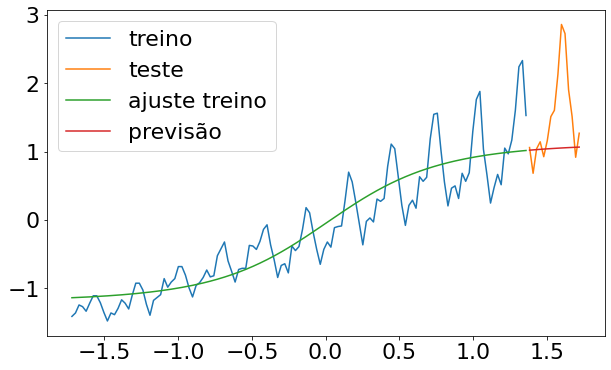

In [26]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtest, y=ytest, label='teste')

sns.lineplot(x=xtreino, y=y_predict2[:,0], label='ajuste treino')
sns.lineplot(x=xtest, y=y_predict_test2[:,0], label='previsão')

Vendo o problema de outra forma

In [27]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i  in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i - n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo



In [28]:
vetor = pd.DataFrame(ytreino)[0]

In [29]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [30]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [31]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [32]:
vetor2 = pd.DataFrame(ytest)[0]

In [33]:
xtest_novo, ytest_novo = separa_dados(vetor2, 1)

In [34]:
xtest_novo[0:5]

array([[1.05982773],
       [0.68341317],
       [1.04309819],
       [1.14347541],
       [0.92599144]])

In [35]:
ytest_novo[0:5]

array([0.68341317, 1.04309819, 1.14347541, 0.92599144, 1.16020494])

Nova rede neural com os dados temporais

In [36]:
regressor3 = Sequential()

regressor3.add(Dense(8,input_dim=1, kernel_initializer='ones',
                     activation='linear', use_bias=False))
regressor3.add(Dense(64,kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

regressor3.compile(loss='mean_squared_error', optimizer='adam')

regressor3.summary()  

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [37]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7475
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8258
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7563
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7612
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7913
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5928
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7187
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6211
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6039
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5603
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4388
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4467
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [38]:
y_predict3 = regressor3.predict(xtreino_novo)

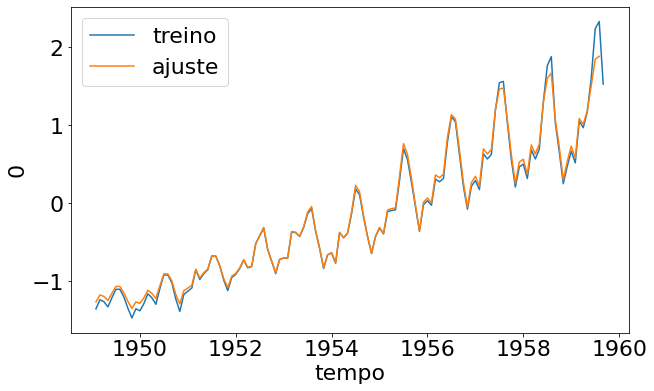

In [39]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict3)[0], data=passageiros[1:129], label='ajuste')

In [40]:
y_predict_teste3 = regressor3.predict(xtest_novo)
y_predict_teste3

array([[1.093061 ],
       [0.7467555],
       [1.0786887],
       [1.1633941],
       [0.9753101],
       [1.1771517],
       [1.4416366],
       [1.5031577],
       [1.7965218],
       [2.062046 ],
       [2.023227 ],
       [1.6826533],
       [1.4416366],
       [0.9677442]], dtype=float32)

In [41]:
resultado = pd.DataFrame(y_predict_teste3)[0]

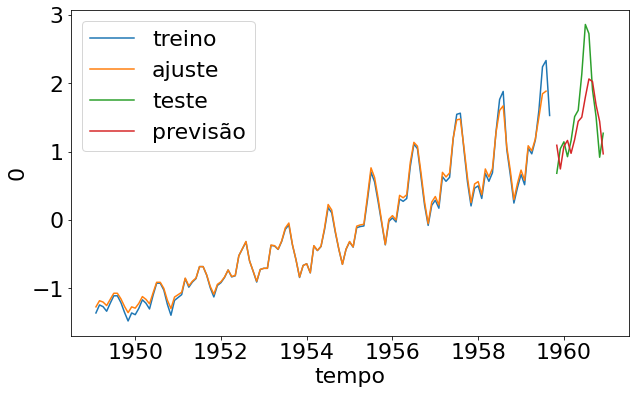

In [42]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict3)[0], data=passageiros[1:129], label='ajuste')

sns.lineplot(x='tempo', y=ytest_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')

In [43]:
xtreino4, ytreino4 = separa_dados(vetor, 4)

In [44]:
xtreino4[:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [45]:
ytreino4[:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [46]:
xtest4, ytest4 = separa_dados(vetor2, 4)

In [47]:
regressor4 = Sequential()

regressor4.add(Dense(8,input_dim=4, kernel_initializer='ones',
                     activation='linear', use_bias=False))
regressor4.add(Dense(64,kernel_initializer='random_uniform',
                     activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform',
                     activation='linear', use_bias=False))

regressor4.compile(loss='mean_squared_error', optimizer='adam')

regressor4.summary()  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [62]:
regressor4.fit(xtreino4, ytreino4, epochs=400)

Epoch 1/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0893
Epoch 2/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0890
Epoch 3/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0893
Epoch 4/400
4/4 [==============================] - 0s 5ms/step - loss: 0.0888
Epoch 5/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0886
Epoch 6/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0887
Epoch 7/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0879
Epoch 8/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0882
Epoch 9/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0877
Epoch 10/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0877
Epoch 11/400
4/4 [==============================] - 0s 3ms/step - loss: 0.0871
Epoch 12/400
4/4 [==============================] - 0s 4ms/step - loss: 0.0870
Epoch 13/400
4/4 [==============================] - 0s 4ms/st

In [64]:
y_predict4 = regressor4.predict(xtreino4)

In [65]:
y_predict_teste4 = regressor4.predict(xtest4)

In [66]:
resultado_ajuste = pd.DataFrame(y_predict4)[0]
resultado = pd.DataFrame(y_predict_teste4)[0]

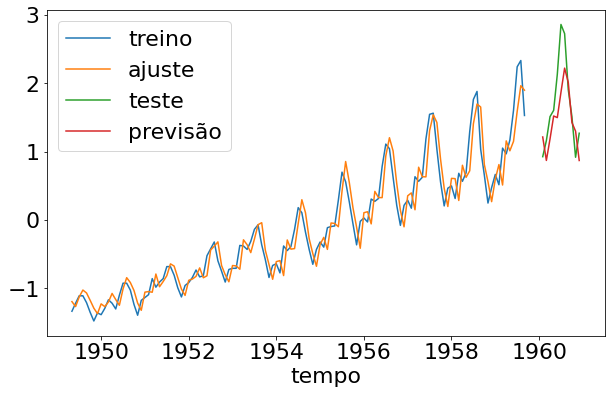

In [67]:
sns.lineplot(x='tempo', y=ytreino4, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_ajuste.values , data=passageiros[4:129], label='ajuste')



sns.lineplot(x='tempo', y=ytest4, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsão')